<a href="https://colab.research.google.com/github/Jubin5/Census/blob/main/DSML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Title of ML project: INCOME LEVEL CASSIFICATION PREDICTIONS**

**Name:** JUBIN K BABU

**Organization:** Entri Elevate

**Date:** [Evaluation Date]


**Overview of Problem Statement:**The ML project aims to predict whether an individual’s income is above or below $50K using the Census Income Dataset from UCI. The dataset includes demographic and work-related features like age, education, occupation, work hours, and capital gain/loss. The workflow involves data preprocessing, exploratory data analysis (EDA), model training using classification algorithms (Logistic Regression, Decision Trees, Random Forest, etc.), and performance evaluation. The best-performing model will be optimized and deployed for practical use. This project provides insights into income disparity factors and can be useful in HR analytics, financial planning, and policy-making


**Objective:** Develop a machine learning model to predict whether an individual earns more than $50K per year based on demographic and employment-related attributes from the UCI Census Income dataset. This model can be useful for socioeconomic analysis, government policy planning, and targeted financial services.

**Data Description:**
Source:[UCI Census Income dataset (also known as "Adult" dataset)]

Features: [age,workclass,fnlwgt,education,education-num,marital-status,	occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,	native-country,income]







```
# This is formatted as code
```

# 4. Data Collection


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



# Define column names based on dataset description
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the .data and .test files into DataFrames
df_train = pd.read_csv("/content/adult.data", names=columns, skipinitialspace=True)
df_test = pd.read_csv("/content/adult.test", names=columns, skipinitialspace=True, skiprows=1)

# Display first few rows
print(df_train.head())
print(df_test.head())

   age         workclass  fnlwgt  education  ...  capital-loss hours-per-week native-country income
0   39         State-gov   77516  Bachelors  ...             0             40  United-States  <=50K
1   50  Self-emp-not-inc   83311  Bachelors  ...             0             13  United-States  <=50K
2   38           Private  215646    HS-grad  ...             0             40  United-States  <=50K
3   53           Private  234721       11th  ...             0             40  United-States  <=50K
4   28           Private  338409  Bachelors  ...             0             40           Cuba  <=50K

[5 rows x 15 columns]
   age  workclass  fnlwgt     education  ...  capital-loss hours-per-week native-country  income
0   25    Private  226802          11th  ...             0             40  United-States  <=50K.
1   38    Private   89814       HS-grad  ...             0             50  United-States  <=50K.
2   28  Local-gov  336951    Assoc-acdm  ...             0             40  United-Stat

**CONVERTING TO DATAFRAME**

In [12]:
# prompt: code to converting this to a dataframe

import pandas as pd
# Concatenate the training and testing datasets
df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined DataFrame
df = df.reset_index(drop=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 5.DATA PREPROCESSING

> Add blockquote



In [13]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
df.duplicated().sum()

29

In [15]:
df.drop_duplicates(inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [16]:
df["sex"].value_counts()

,count
sex,
Male,32631
Female,16182


Here male count is greater than female


In [17]:
df["race"].value_counts()

,count
race,
White,41736
Black,4683
Asian-Pac-Islander,1518
Amer-Indian-Eskimo,470
Other,406


In [18]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
?,856
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [19]:
df["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [20]:
df["income"].value_counts()

,count
income,
<=50K,24698
<=50K.,12430
>50K,7839
>50K.,3846


In [21]:
# Replace income values
df["income"] = df["income"].replace({"<=50K.": "<50K", "<=50K": "<50K"})
df["income"] = df["income"].replace({">50K.": ">50K"})
df["income"].value_counts()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<50K


In [22]:
df['native-country'] = df['native-country'].replace("?", np.nan)


In [23]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [24]:
print(df['native-country'].isnull().sum())


856


In [25]:
most_frequent_country = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(most_frequent_country)


In [26]:
print(df['native-country'].isnull().sum())


0


In the above code we replaced the "?" in the native country column to nan value and then replaced with its mode value and then again we checked for the null values


In [27]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
df.select_dtypes(include="number").skew()

,0
age,0.556775
fnlwgt,1.439534
education-num,-0.315007
capital-gain,11.891093
capital-loss,4.568263
hours-per-week,0.239643


Here we can see that the most outliers are  present in the columns "capital-loss" and capital-gain",we are mainly focussing to build an ML model of classification so in that case we not needed to remove this outlier otherwise it will give negative result with low accuracy


In [29]:
def remove_outliers(df,coloumns):
  df_filtered=df.copy()
  for i in coloumns:
    q1=df[i].quantile(.25)
    q2=df[i].quantile(.75)
    lowerwhisker=q1-1.5*(q2-q1)
    upperwhisker=q2+0.5*(q2-q1)
    df_filtered=df_filtered[(df_filtered[i]>=lowerwhisker)&(df_filtered[i]<=upperwhisker)]
  return df_filtered

In [30]:
remove_outliers(df,["capital-loss","capital-gain","fnlwgt"])
df_filtered=df

In [31]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])



In [32]:
# Step 1: Separate the features (X) and target (y)
from imblearn.over_sampling import SMOTE
X = df.drop('income', axis=1)  # Features excluding the target
y = df['income']  # Target column
X = pd.get_dummies(X, drop_first=True) # This line is crucial for converting categorical features

# Apply SMOTE first to balance the classes, you can change this line in accordance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Convert the resampled data back to a DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['income'])


# Step 5: Optionally, combine the resampled features and target back into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Check the new class distribution to ensure balance
# print(df_resampled['income'].value_counts())

print(df_resampled)

       age  fnlwgt  education-num  ...  native-country_Vietnam  native-country_Yugoslavia  income
0       39   77516             13  ...                   False                      False       0
1       50   83311             13  ...                   False                      False       0
2       38  215646              9  ...                   False                      False       0
3       53  234721              7  ...                   False                      False       0
4       28  338409             13  ...                   False                      False       0
...    ...     ...            ...  ...                     ...                        ...     ...
74251   44  233503             13  ...                   False                      False       1
74252   57  314132             12  ...                   False                      False       1
74253   38   46455             11  ...                   False                      False       1
74254   30   72887  

# 6. EXPLORATORY DATA ANALYSIS(EDA)

<ipython-input-33-075a2519cf37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_resampled['age'])


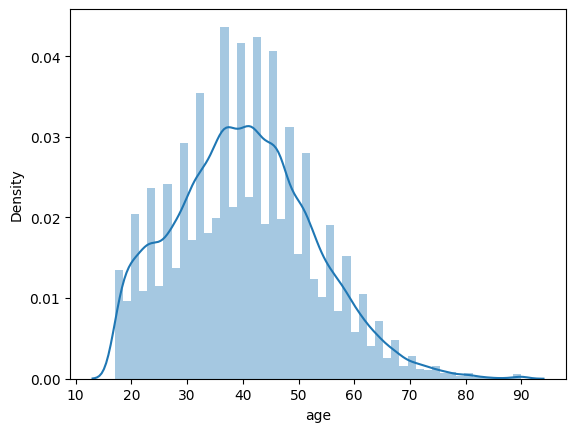

In [33]:
sns.distplot(df_resampled['age'])
plt.show()


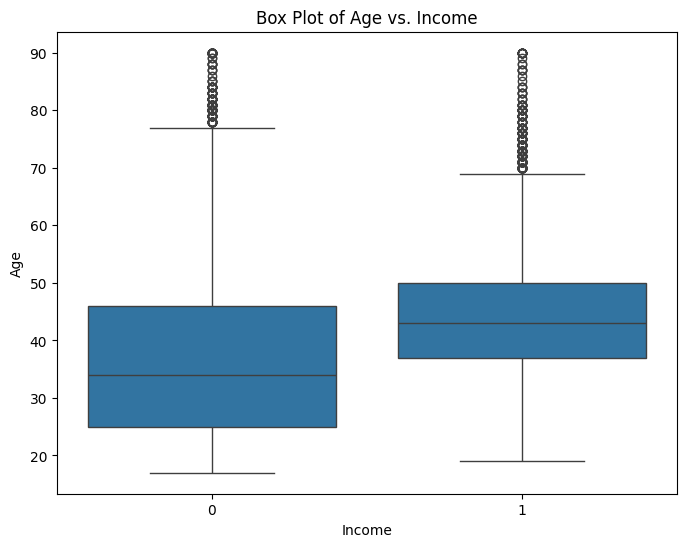

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df_resampled)
plt.title('Box Plot of Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


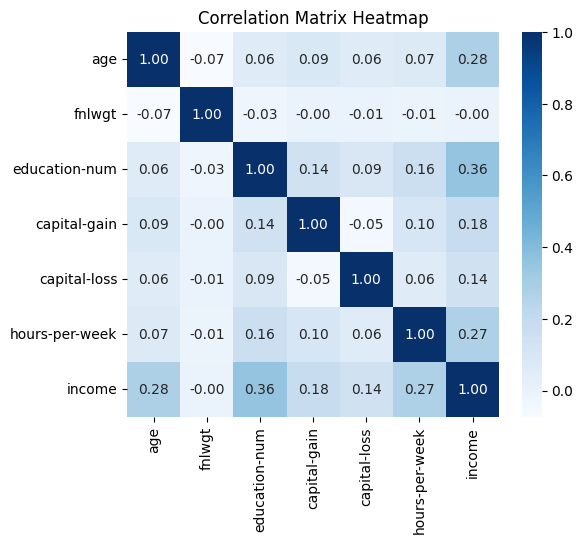

In [35]:
import matplotlib.pyplot as plt
numeric_df = df_resampled.select_dtypes(include=np.number)

plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# 8. FEATURE SELECTION

In [37]:

from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(chi2, k=10) # Select top 10 features
X_new = selector.fit_transform(X_resampled_df, y_resampled_df)

# Get the selected features' names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_resampled_df.columns[selected_feature_indices]

print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_selected = X_resampled_df[selected_features]



Selected Features: Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'education_HS-grad', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Not-in-family',
       'relationship_Own-child'],
      dtype='object')



#9. Split Data into Training and Testing Sets


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2)

# 11.Build the ML Model:

In [48]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create a dictionary of models
models = {
    "Lr": LogisticRegression(),
    "Svm": SVC(),
    "Dt": DecisionTreeClassifier(),
    "Rf": RandomForestClassifier(),
    "Gb": GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Training Lr...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lr Accuracy: 0.624899003501212
Training Svm...


KeyboardInterrupt: 

#13. Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Perform GridSearchCV
tuned_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=1
)
tuned_grid.fit(X_train, y_train.values.ravel())
print("Best parameters from GridSearchCV:", tuned_grid.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] EN

In [40]:
# # Train final model using best parameters
best_rf = RandomForestClassifier(bootstrap= True,max_depth= 30,min_samples_leaf=1,min_samples_split=10,n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [42]:
y_pred = best_rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

# 12.Model Evaluation

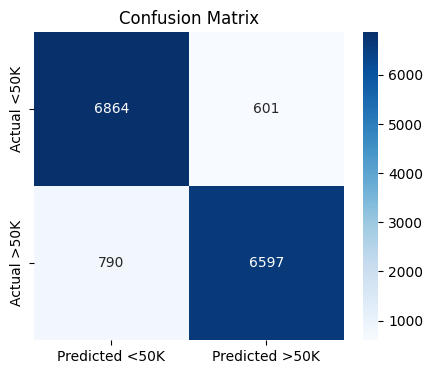

Accuracy: 0.906342580123889
Precision: 0.9165045846068353
Recall: 0.893055367537566
F1-Score: 0.9046280425094275


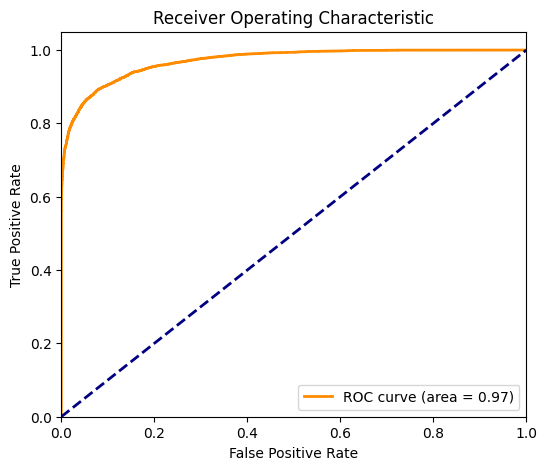

In [45]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Predict probabilities for the positive class (income > 50K)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=["Predicted <50K", "Predicted >50K"],
yticklabels=["Actual <50K", "Actual >50K"])
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [47]:
import pandas as pd

accuracy = 0.906342580123889
precision =0.9165045846068353
recall =0.893055367537566
F1 = 0.9046280425094275

# Create a dictionary with the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, F1]
}

# Create a Pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame as a table
metrics_df


,Metric,Value
0,Accuracy,0.906343
1,Precision,0.916505
2,Recall,0.893055
3,F1-Score,0.904628
